#Data Project - Stock Market Analysis 

Gaurav Goel  

Problem statement

In this project I would be looking at data from the stock market, particularly some technology stocks. I will learn how to use pandas to get stock information, visualize different aspects of it, and finally  will look at a few ways of analyzing the risk of a stock, based on its previous performance history. I will use Monte Carlo method! to predict future stock prices

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time? # graph 
    2.) What was the daily return of the stock on average? # difference between opening and closing prices
    3.) What was the moving average of the various stocks? # rolling_mean
    4.) What was the correlation between different stocks' closing prices? # draw the scatter plot to plot the relationship between different 
    4.) What was the correlation between different stocks' daily returns?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior?
    7) Some outperforming stocks in given sector

Data set up
-------------
####Basic Analysis of Stock Information

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:

import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

C:\Users\gaurav\Anaconda\lib\site-packages\pytz\__init__.py:29: UserWarning: Module argparse was already imported from C:\Users\gaurav\Anaconda\lib\argparse.pyc, but c:\users\gaurav\anaconda\lib\site-packages is being added to sys.path
  from pkg_resources import resource_stream


In [2]:
end = datetime.now()
print end

2015-12-17 15:10:59.741000


Let's use Yahoo and pandas to grab some data for some tech stocks.

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
print end
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    

2015-12-17 15:11:03.181000


We will use AAPL DataFrame to get a feel for the data

In [38]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,120.309127,121.407262,119.022103,120.202420,5.200116e+07,119.135084
std,7.516378,7.233217,7.722922,7.465731,2.109502e+07,7.289177
min,94.870003,107.430000,92.000000,103.120003,1.302370e+07,102.680478
25%,113.567497,114.527499,112.229998,113.479998,3.758148e+07,112.953997
50%,120.795002,121.584999,119.349998,120.299999,4.750930e+07,119.658136
75%,127.142502,127.907497,125.982502,126.912502,6.076888e+07,125.492359
max,134.460007,134.539993,131.399994,133.000000,1.622063e+08,131.380384


In [39]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2014-12-15 to 2015-12-14
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the stocks

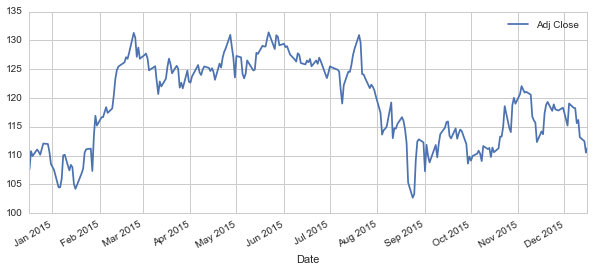

In [15]:

# Let's see a historical view of the closing price over the past 1 year
#Adj Close keyword
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

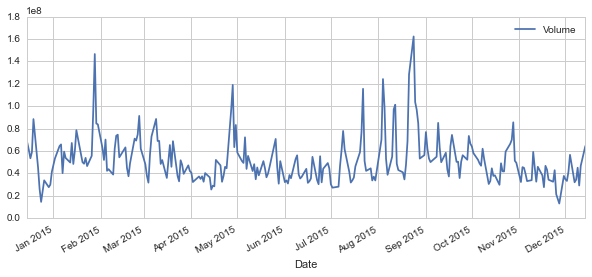

In [41]:
# Now let's plot the total volume of stock being traded each day over the past 1 year
# Volume keyword
AAPL['Volume'].plot(legend=True,figsize=(10,4))

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

In [5]:
# Luckily pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

Now let's go ahead and plot all the additional Moving Averages

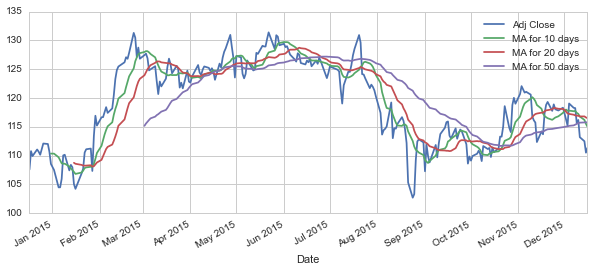

In [6]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

#### Section 2 - Daily Return Analysis

Now after doing some baseline analysis, let's go ahead and dive a little deeper. Let's analyze the risk of the stock. In order to do so we'll take a closer look at the daily changes of the stock, and not just its absolute value. We use pandas to retrieve teh daily returns for the Apple stock.

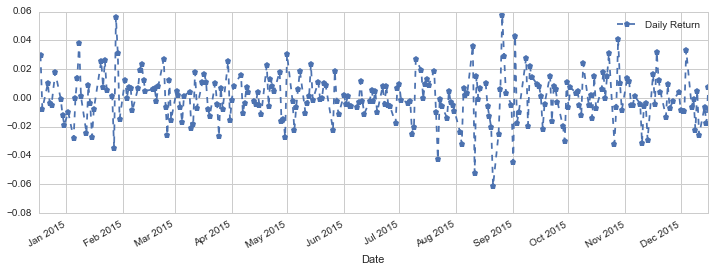

In [7]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='p')

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

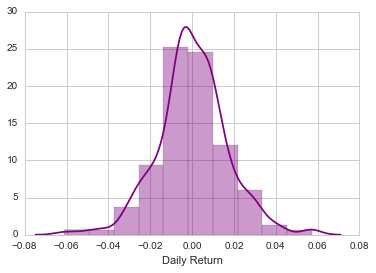

In [8]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=10,color='purple')

# Could have also done:
#AAPL['Daily Return'].hist()

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [9]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [10]:
# Let's take a quick look
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-12-17,107.577069,298.880005,504.892295,44.527791
2014-12-18,110.762787,297.730011,511.102319,46.260616
2014-12-19,109.907360,299.899994,516.352313,46.396905
2014-12-22,111.047930,306.540009,524.872383,46.708424
2014-12-23,110.654630,306.290009,530.592416,47.165970


Now that we have all the closing prices, we will get the daily return for all the stocks, like we did for the Apple stock.

In [11]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

In [48]:
print tech_rets

                AAPL      AMZN      GOOG      MSFT
Date                                              
2014-12-15       NaN       NaN       NaN       NaN
2014-12-16 -0.013675 -0.035972 -0.035831 -0.032355
2014-12-17  0.024918  0.012947  0.019177  0.012843
2014-12-18  0.029613 -0.003848  0.012300  0.038916
2014-12-19 -0.007723  0.007288  0.010272  0.002946
2014-12-22  0.010378  0.022141  0.016500  0.006714
2014-12-23 -0.003542 -0.000816  0.010898  0.009796
2014-12-24 -0.004709 -0.010644 -0.003430 -0.006398
2014-12-26  0.017677  0.019998  0.009948 -0.005401
2014-12-29 -0.000702  0.009544 -0.006928 -0.008981
2014-12-30 -0.012203 -0.005576  0.000170 -0.009062
2014-12-31 -0.019019  0.000161 -0.007579 -0.012122
2015-01-02 -0.009513 -0.005897 -0.003020  0.006674
2015-01-05 -0.028172 -0.020517 -0.020846 -0.009196
2015-01-06  0.000094 -0.022833 -0.023177 -0.014677
2015-01-07  0.014022  0.010600 -0.001713  0.012705
2015-01-08  0.038422  0.006836  0.003153  0.029418
2015-01-09  0.001073 -0.011749 

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

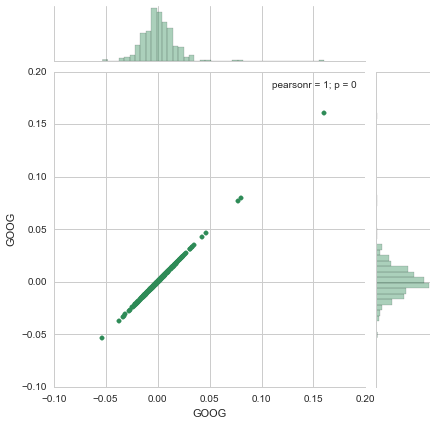

In [12]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

In [ ]:
sns.corrplot(tech_rets.dropna(),annot=True)

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Google and Microsoft the same way.

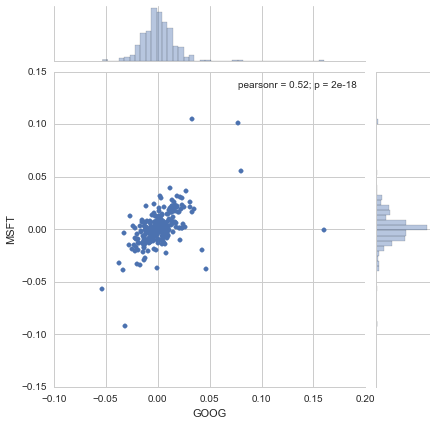

In [13]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

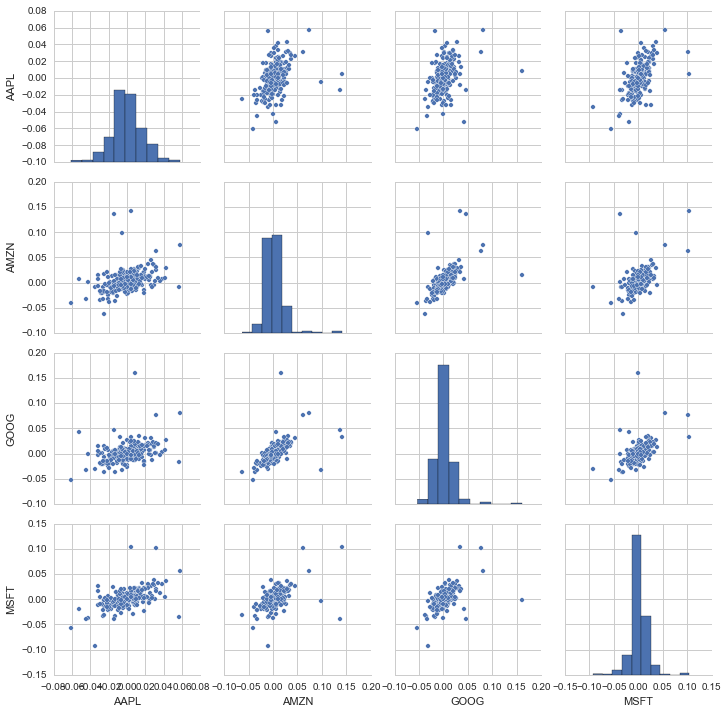

In [50]:
sns.pairplot(tech_rets.dropna())

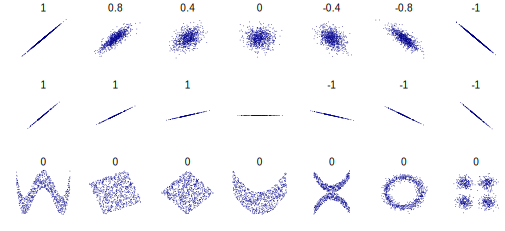

In [16]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

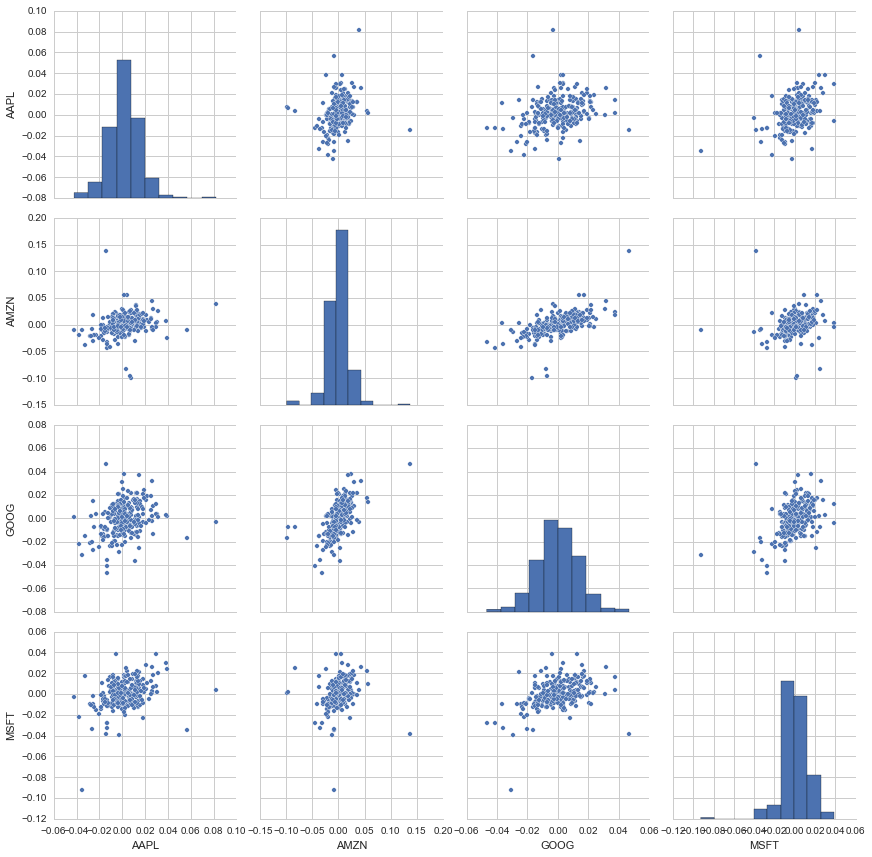

In [17]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. 

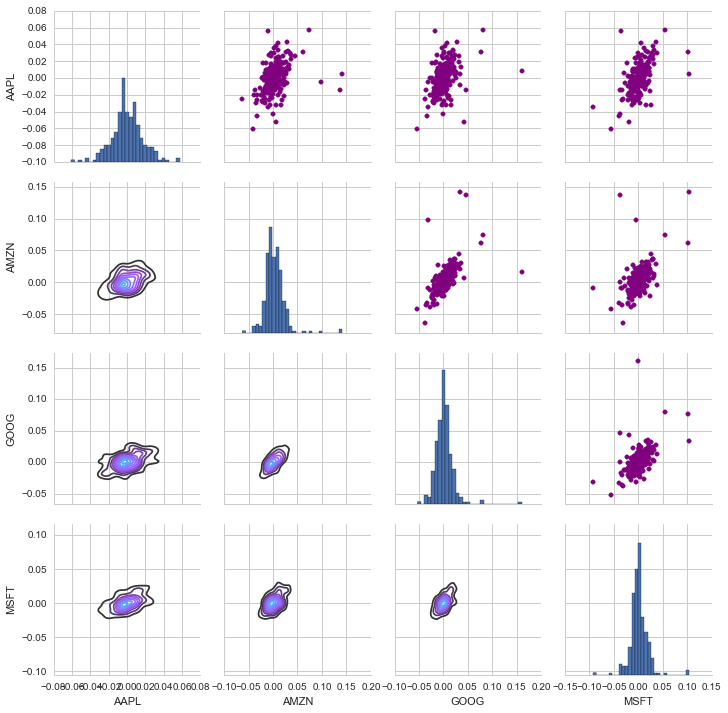

In [26]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

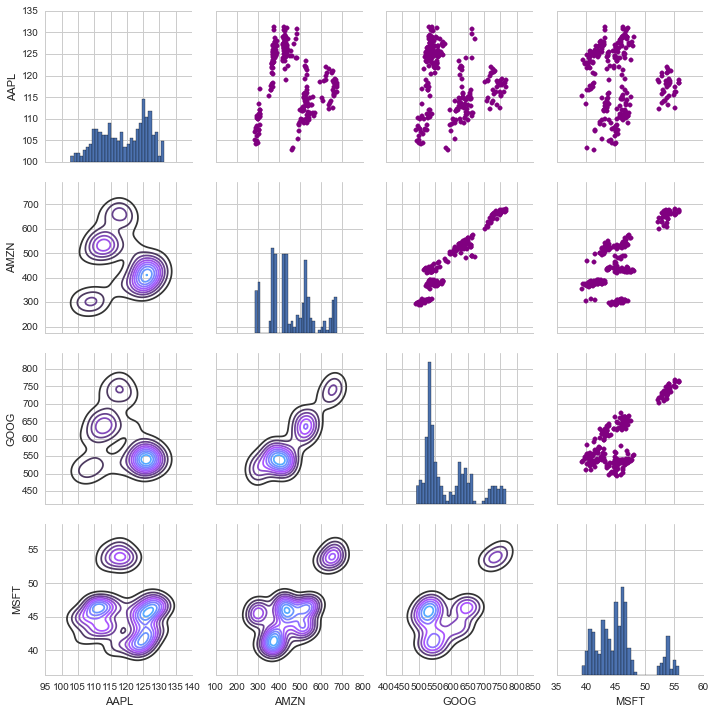

In [51]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

C:\Users\gaurav\Anaconda\lib\site-packages\seaborn\linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\gaurav\Anaconda\lib\site-packages\seaborn\linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


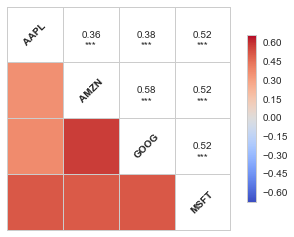

In [30]:
Results
========
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.corrplot(tech_rets.dropna(),annot=True)

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

Great! Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

#### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected average return of the year with the standard deviation of the daily returns.

In [52]:
rets = tech_rets.dropna()
#print rets
print rets.mean()
print rets.std()

AAPL    0.000362
AMZN    0.003270
GOOG    0.001664
MSFT    0.000931
dtype: float64
AAPL    0.016852
AMZN    0.021223
GOOG    0.018697
MSFT    0.017963
dtype: float64


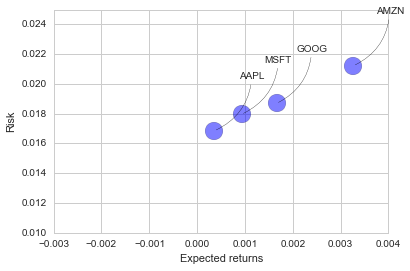

In [53]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*100

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


#### Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could  expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

#### Value at risk using the "bootstrap" method

For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

In [ ]:
Quantiles are cutpoints dividing a set of observations into equal sized groups. There are one fewer quantiles than the 
number of groups created. Thus quartiles are the 3 cut points that will divide a dataset into four equal-size groups. 
Common quantiles have special names: for instance quartile, decile (creating 10 groups: see below for more). The groups 
created are termed halves, thirds, quarters, etc., though sometimes the terms for the quantile are used for the groups 
created, rather than for the cut points.

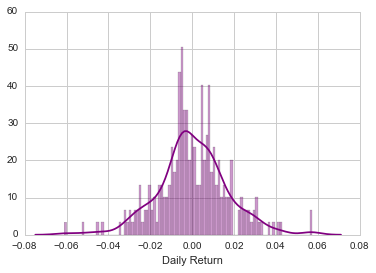

In [54]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

Now we can use quantile to get the risk value for the stock.

In [58]:
rets['AAPL']

Date
2014-12-16   -0.013675
2014-12-17    0.024918
2014-12-18    0.029613
2014-12-19   -0.007723
2014-12-22    0.010378
2014-12-23   -0.003542
2014-12-24   -0.004709
2014-12-26    0.017677
2014-12-29   -0.000702
2014-12-30   -0.012203
2014-12-31   -0.019019
2015-01-02   -0.009513
2015-01-05   -0.028172
2015-01-06    0.000094
2015-01-07    0.014022
2015-01-08    0.038422
2015-01-09    0.001073
2015-01-12   -0.024641
2015-01-13    0.008879
2015-01-14   -0.003811
2015-01-15   -0.027140
2015-01-16   -0.007770
2015-01-20    0.025757
2015-01-21    0.007634
2015-01-22    0.026016
2015-01-23    0.005160
2015-01-26    0.001062
2015-01-27   -0.035013
2015-01-28    0.056533
2015-01-29    0.031134
                ...   
2015-11-02    0.014059
2015-11-03    0.011471
2015-11-04   -0.004650
2015-11-05   -0.004610
2015-11-06    0.001158
2015-11-09   -0.004048
2015-11-10   -0.031517
2015-11-11   -0.005652
2015-11-12   -0.003359
2015-11-13   -0.029208
2015-11-16    0.016379
2015-11-17   -0.004291
2015-1

In [55]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.026628385427028001

The 0.05 empirical quantile of daily returns is at -0.026. That means that with 95% confidence, our worst daily loss will not exceed 2.6%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.026 * 1,000,000 = $26,000.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

In [57]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.80)

0.011470527636530781

In [ ]:
The 0.80 empirical quantile of daily returns is at 0.011470527636530781. That means that with 20% confidence, our maxprofit will not exceed .6%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.026 * 1,000,000 = $26,000.
Now I'll look at value at risk by implementing a Monte Carlo method.

In [ ]:
Monte Carlo simulation 

It is a computerized mathematical technique that allows people to account for risk in quantitative 
analysis and decision making. The technique is used by professionals in such widely disparate fields as finance, project
management, energy, manufacturing, engineering, research and development, insurance, oil & gas, transportation, and the 
environment.

Probabilistic Results. Results show not only what could happen, but how likely each outcome is.

Simulate stock prices over a horizon.

####Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM)

mu is expected return and sigma is the standard eviation.


Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$ 

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.


To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [28]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [59]:
 rets.std()['GOOG']

0.01869717709715777

In [37]:
price = np.zeros(days)
print price

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

Next, we will create a function that takes in the starting price and number of days, and uses teh sigma and mu we already calculated form out daily returns

In [17]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for j in xrange(1,days):
        
        # Calculate Schock
        shock[j] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[j] = mu * dt
        # Calculate Price
        price[j] = price[j-1] + (price[j-1] * (drift[j] + shock[j]))
        
    return price

In [60]:
print  GOOG.head()

                  Open        High         Low       Close   Volume  \
Date                                                                  
2014-12-15  522.742335  523.102331  513.272333  513.802290  2813400   
2014-12-16  511.562321  513.052308  489.002220  495.392273  3964300   
2014-12-17  497.002248  507.002299  496.812244  504.892295  2883200   
2014-12-18  512.952333  513.872306  504.702290  511.102319  2926700   
2014-12-19  511.512318  517.722342  506.913310  516.352313  3690200   

             Adj Close  
Date                    
2014-12-15  513.802290  
2014-12-16  495.392273  
2014-12-17  504.892295  
2014-12-18  511.102319  
2014-12-19  516.352313  


Grate now let's put our function to work!

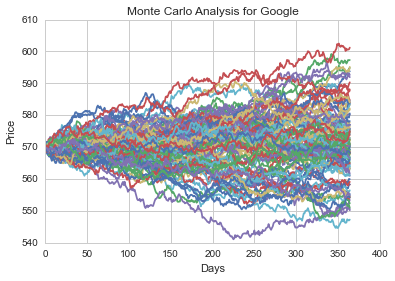

In [34]:
# Get start price from GOOG.head()

start_price = 569.85

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

We will create a histogram of the end results for a much larger run.

In [139]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];


Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.



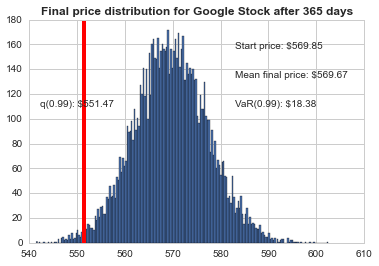

In [152]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Here we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $18.38 for every investment of 569.85 (the price of one inital google stock).

This basically means for every initial stock you purchase your putting about $18.38 at risk 99% of the time from our Monte Carlo Simulation.